<a href="https://colab.research.google.com/github/annissatessffaaye/QA-Data-Engineering-Bootcamp-Azure-Python-SQL/blob/main/Choosing_the_right_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [ ]:
# In our dataset of breast_cancer.csv, we have following discrete, and continuous columns:
# id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean,
#compactness_mean, concavity_mean, symmetry_mean, fractional_dimension_mean


# I am trying to form an equation
# y' = w1* C1 + w2* C2 .... +bias 
#which in this case is y' = w1*id + w2* diagnosis + w3*radius_mean.... +bias

# What I am trying to predict based on the equation above is
# Which person has malignant lump= cancer or benign lump=no cancer

### Q. Identify candidate questions for your machine learning project

In [ ]:
!"/usr/bin/python3" -m pip install azureml-dataset-runtime --upgrade
!pip install azureml-core
# The problem domain is one of Classification
#I'm trying to determine whether someone has cancer or not.

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '85e00306-75a8-4002-9ecc-df390c5255c2'
resource_group = 'projday'
workspace_name = 'projdaywkspc'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Breast Cancer Classification')
dataset.to_pandas_dataframe()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
#To discover duplicates, we can use the duplicated() method.
#The duplicated() method returns a Boolean values for each row:
print(dataset.to_pandas_dataframe().duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1133    False
1134    False
1135    False
1136    False
1137    False
Length: 1138, dtype: bool


In [ ]:
#Checking to see if there any null values in the daignoses column and there aren't
#the dataset was accidentlly uploaded twice to the csv file so total values is actually 569 not 1138
dataset.to_pandas_dataframe().iloc[0:569]



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


In [ ]:
dataset.to_pandas_dataframe().head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
# I want to check what the quartile ranges are for the sata, the standard deviation and the min, maz values
#I'll go further into these values in further cells of code to see if I have any outliers.
dataset.to_pandas_dataframe().describe() 


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,1.138000e+03,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,1.523243e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,8.965268e+07,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.027402,0.007057
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,9.299525e+04,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,9.327950e+04,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,9.060125e+05,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [ ]:
dataset.to_pandas_dataframe().corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


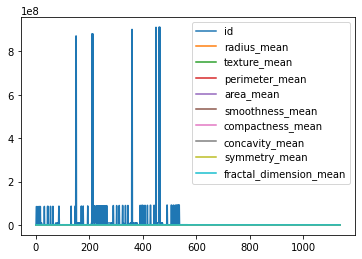

In [ ]:

dataset.to_pandas_dataframe().plot()

In [ ]:
#pandas function-> .corr()
all_correlations = dataset.to_pandas_dataframe().corr()
all_correlations


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


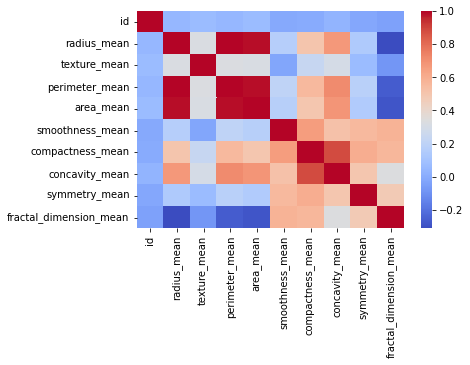

In [ ]:
# VISUALIZATION to understand correlation is a LOT easier than looking at the numbers!
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(all_correlations, cmap='coolwarm')
plt.show()



In [ ]:
#in a clearer way I want to look at the mean of each column
dataset.to_pandas_dataframe().mean(), 

(id                        1.523243e+07
 radius_mean               1.412729e+01
 texture_mean              1.928965e+01
 perimeter_mean            9.196903e+01
 area_mean                 6.548891e+02
 smoothness_mean           9.636028e-02
 compactness_mean          1.043410e-01
 concavity_mean            8.879932e-02
 symmetry_mean             1.811619e-01
 fractal_dimension_mean    6.279761e-02
 dtype: float64,)

In [ ]:
#descriptive stats for all single columns
#I will use value_counts() to get a Series containing counts of unique values. 
#The resulting object will be in descending order
#so that the first element is the most frequently-occurring element.
dataset.to_pandas_dataframe().value_counts()

id         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  fractal_dimension_mean
911320502  B          13.170       18.22         84.28           537.3      0.07466          0.05994           0.048590        0.1454         0.05549                   1
93092      B          14.420       16.54         94.15           641.2      0.09751          0.11390           0.080070        0.1912         0.06412                   1
93086      B          12.300       19.02         77.88           464.4      0.08313          0.04202           0.007756        0.1539         0.05945                   1
93087      M          17.060       21.00         111.80          918.6      0.11190          0.10560           0.150800        0.1727         0.06071                   1
93088      B          12.990       14.23         84.08           514.3      0.09462          0.09965           0.037380        0.1652         0.07238      

In [ ]:
#To get a clearer way I want to look at the median of each column
dataset.to_pandas_dataframe().median()

id                        93279.50000
radius_mean                  13.37000
texture_mean                 18.84000
perimeter_mean               86.24000
area_mean                   551.10000
smoothness_mean               0.09587
compactness_mean              0.09263
concavity_mean                0.06154
symmetry_mean                 0.17920
fractal_dimension_mean        0.06154
dtype: float64

In [ ]:
#To get a clearer way I want to look at the standard deviation of each column
dataset.to_pandas_dataframe().std()

id                        8.965268e+07
radius_mean               3.522499e+00
texture_mean              4.299144e+00
perimeter_mean            2.428829e+01
area_mean                 3.517593e+02
smoothness_mean           1.405794e-02
compactness_mean          5.278953e-02
concavity_mean            7.968474e-02
symmetry_mean             2.740222e-02
fractal_dimension_mean    7.057257e-03
dtype: float64

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
#There are no MCARs in
#Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data 
#and any values, observed or missing. ... Missing at Random, MAR, means there is a systematic relationship 
#between the propensity of missing values and the observed data, but not the missing data.


#There is MARs because the missing values we assume they were unable to get because the file csv was uploaded twice 
#so there should be 569 people researched but the dataset will look like 1138. We know all the people were daignosed.
#Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully accounted 
#for by variables where there is complete information. Since MAR is an assumption that is impossible to verify 
#statistically, we must rely on its substantive reasonableness.

#There are no MNARs
#Let's first define Missing Not at Random (MNAR): There is a relationship between the propensity of a value to be 
#missing and its values. In other words, data are missing not at random when the missing values of a variable are 
#related to the values of that variable itself, even after controlling for other variables.



# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
#I'm using the classification model because I have discrete values that I want to use to classify
#these discrete values are:
#m for malignant and b for benign.

PLEASE USE ABOVE LINK if working in Python

ELSE paste screenshots of AutoML and/or ML Pipelines here for problem statement 

# Part 4: Model Evaluation

Upload the metrics screenshots/ or python code to evaluate models (metrics)- 

Classification- F1 Score, Precision, Recall, Accuracy, Confusion Matrix 

Regression - Mean Absolute Error, Mean Squared error, Normalized MSE, Coefficient of Deter. 

Experiments in Azure!

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

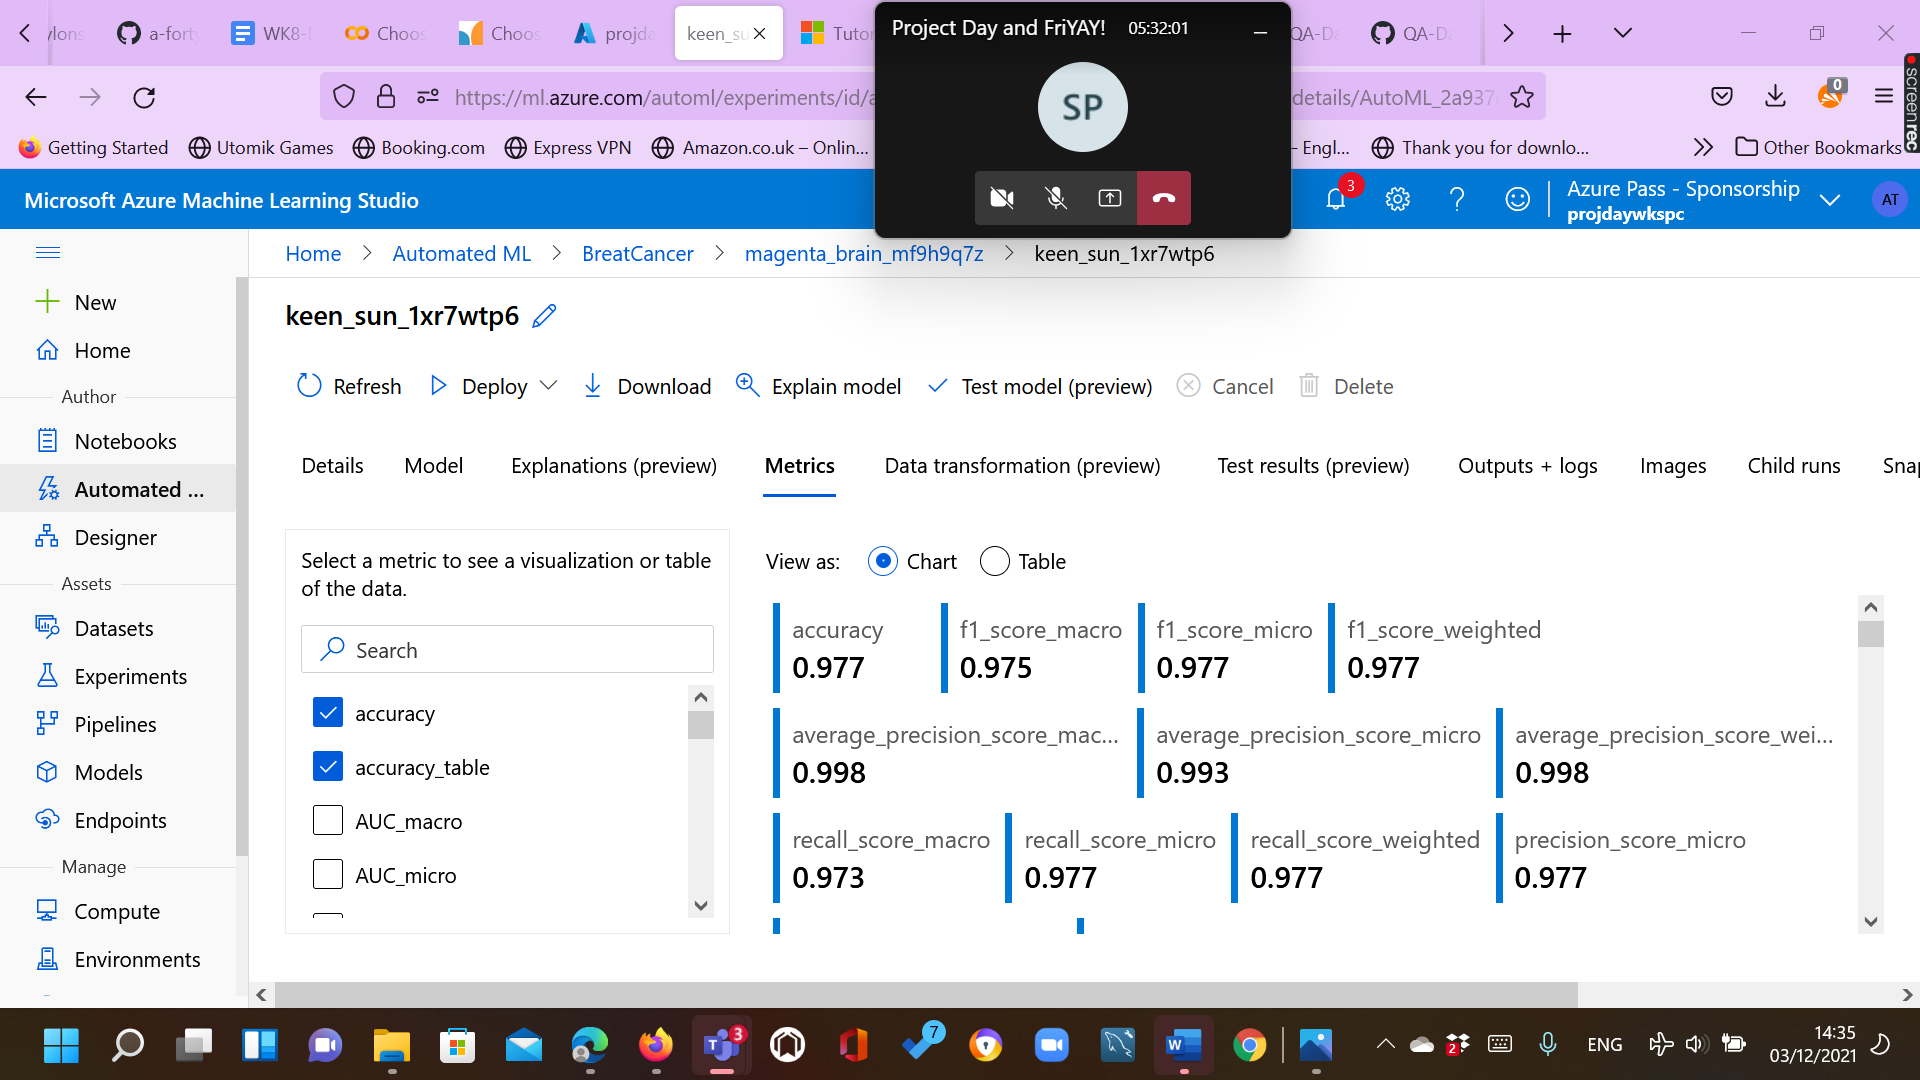

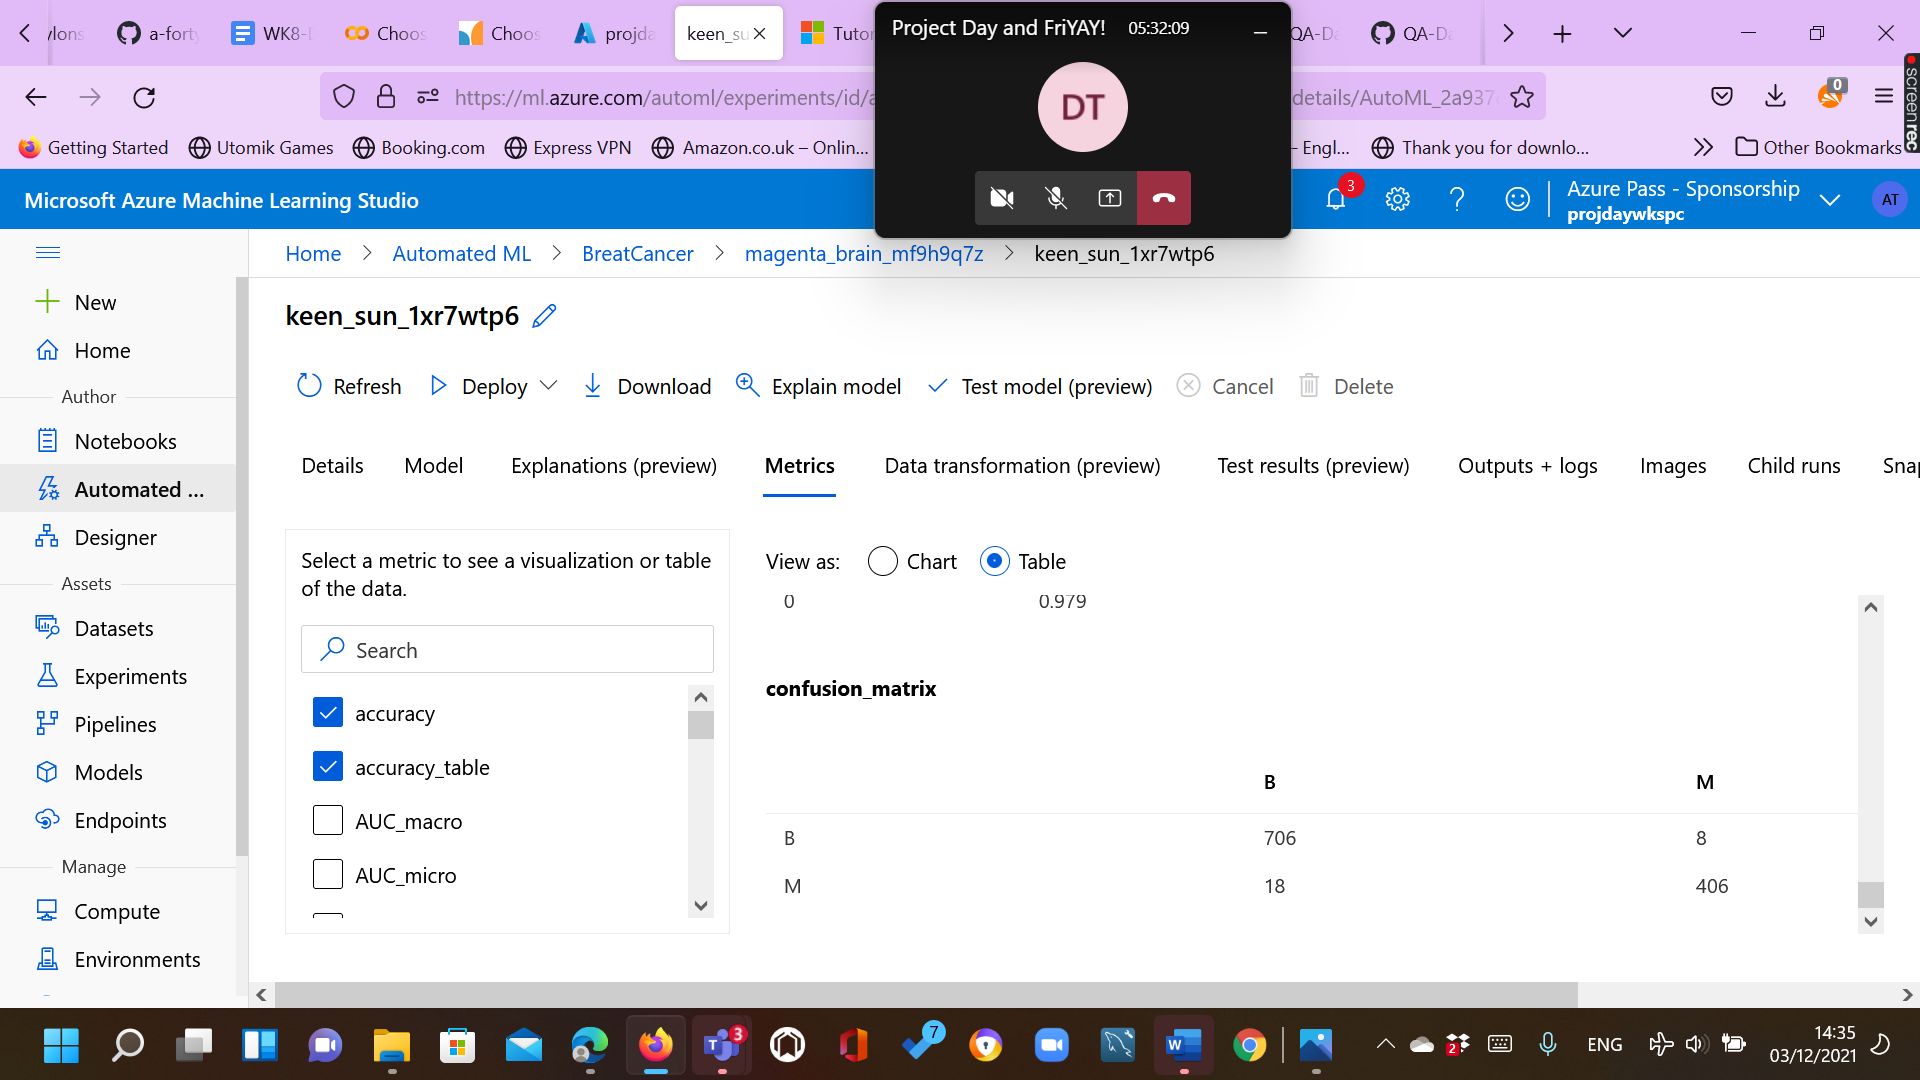


# Part 5: Stretch - Model Deployment

In [ ]:
#Deployed with a Container Instance



import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://bdad2942-4af8-42e2-96f4-97d0e87357bc.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))
